In [27]:
import numpy as np
import pandas as pd
import plotly.express as px
import xAPIConnector
from dotenv import load_dotenv
import os
import time
import json

In [36]:
stocks = pd.read_csv("calculated.csv", index_col=0)
print(f"Before: {stocks.shape}")
stocks = stocks[stocks["return"] > 0.04]
#stocks = stocks[(stocks["risk"] < 0.4) & (stocks["risk"] > 0.04 )]
print(f"After: {stocks.shape}")

Before: (454, 2)
After: (49, 2)


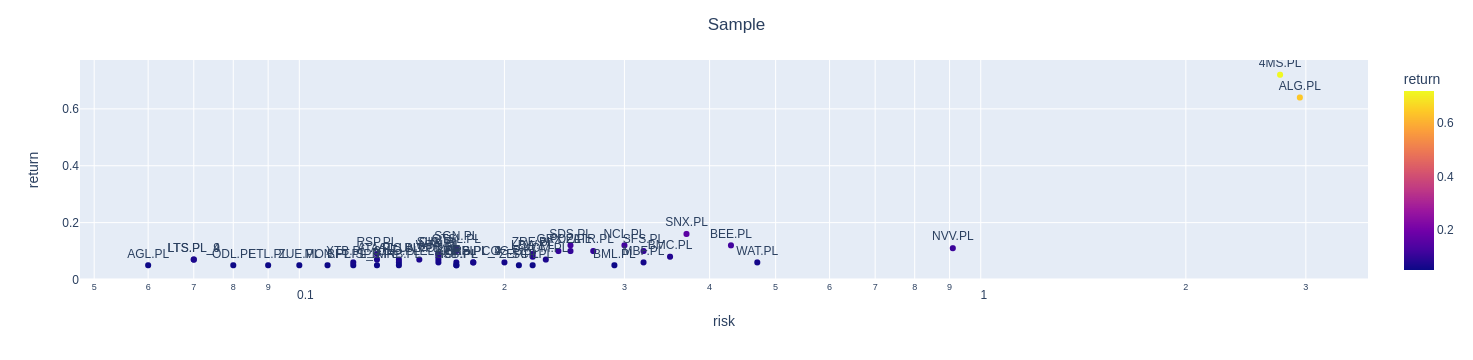

In [37]:
fig = px.scatter(stocks, x="risk", y="return", text=stocks.index.values, log_x=True, size_max=100, color="return")
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Sample', title_x=0.5)
fig.show()

In [30]:
def get_price(instrument: str):
    payload = {"period": 43200, "start": 1640998800000,
               "symbol": instrument}
    load_dotenv()
    userId = os.environ.get("LOGIN")
    password = os.environ.get("PASSWORD")
    client = xAPIConnector.APIClient()
    login_response = client.execute(xAPIConnector.loginCommand(userId=userId, password=password))
    ssid = login_response['streamSessionId']
    resp = client.commandExecute('getChartLastRequest', dict(info=payload))
    client.disconnect()
    return resp

def stock_calc(data):
    price = []
    for idx in range(len(data)-1):
        tmp = ((data[idx+1]["open"]+data[idx+1]["close"]) - (data[idx]["open"]+data[idx]["close"])) / (data[idx]["open"]+data[idx]["close"])
        price.append(tmp)
    price = np.array(price)
    return np.mean(price).__round__(2), np.std(price).__round__(2)

def parser(name: str):
    stock_data = get_price(name)
    return stock_calc(stock_data["returnData"]["rateInfos"])

def price_list(name: str):
    stock_data = get_price(name)
    prices = []
    for x in stock_data["returnData"]["rateInfos"]:
        prices.append(x["open"]+x["close"])
    
    return prices

In [34]:
sp_50_dict = {}
sp_50_cov = np.zeros((stocks.shape[0],stocks.shape[0]))

In [35]:
# build covariance matrix
def calculate_increases(name):
    
    Endings = prices.Close
    prices = price_list(name)
    increases = []
    for i in range(len(prices) - 1):
        increase = (price[i+1] - prices[i])/prices[i]
        increases.append(increase)
    increases_ = np.array(increases)
    return increases

for name in names:
    sp_50_dict[name] = calculate_increases(name)

for i in range(stocks.shape[0]):
    for j in range(stocks.shape[0]):
        cov = np.cov(sp_50_dict[names[i]], sp_50_dict[names[j]])[0][1]
        sp_50_cov[i,j] = cov

NameError: name 'names' is not defined